## Load Wine Dataset

In [11]:
from sklearn.datasets import load_wine
wine = load_wine()

In [12]:
print(wine.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [13]:
print(wine.data.shape)
print(wine.target.shape)
print(wine.target_names)
print(wine.feature_names)

print(wine.DESCR)

(178, 13)
(178,)
['class_0' 'class_1' 'class_2']
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Wine Data Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- 1) Alcohol
 		- 2) Malic acid
 		- 3) Ash
		- 4) Alcalinity of ash  
 		- 5) Magnesium
		- 6) Total phenols
 		- 7) Flavanoids
 		- 8) Nonflavanoid phenols
 		- 9) Proanthocyanins
		- 10)Color intensity
 		- 11)Hue
 		- 12)OD280/OD315 of diluted wines
 		- 13)Proline
        	- class:
                - class_0
                - class_1
                - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD


## Use pandas for handling data

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

df = pd.DataFrame(wine.data, columns = wine.feature_names)
df['target'] = wine.target

In [15]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [16]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Visualize

### Histgram and boxplot

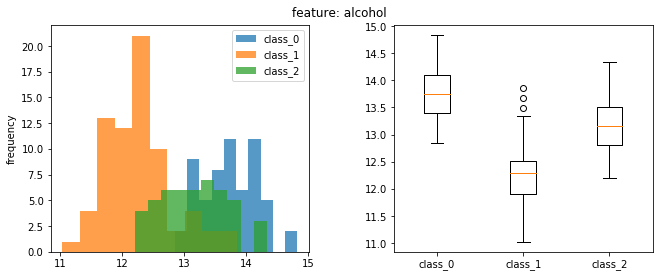

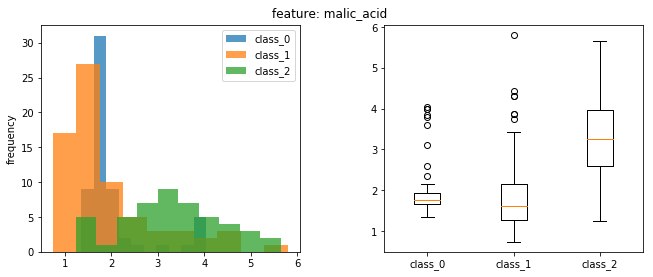

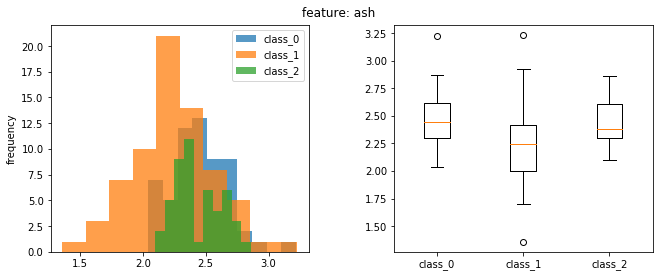

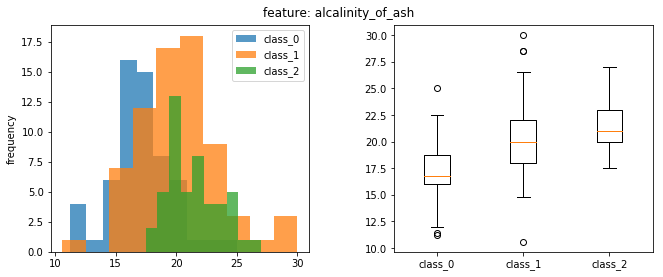

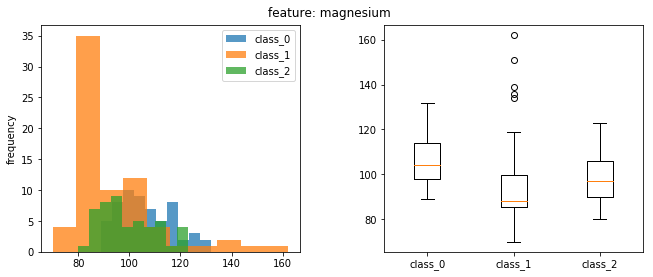

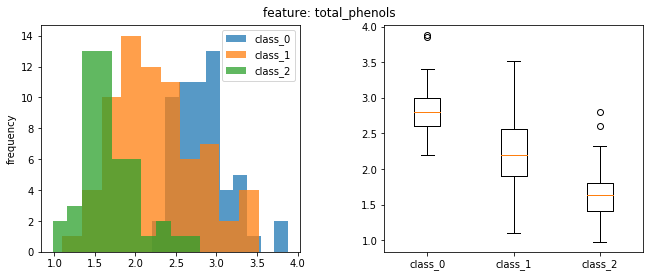

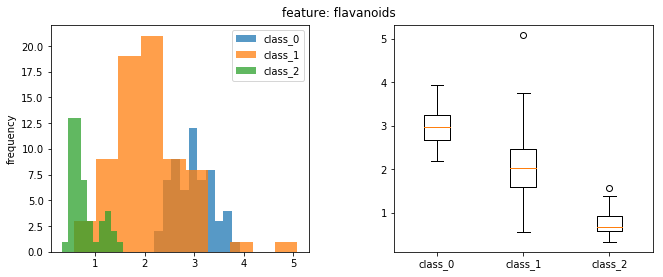

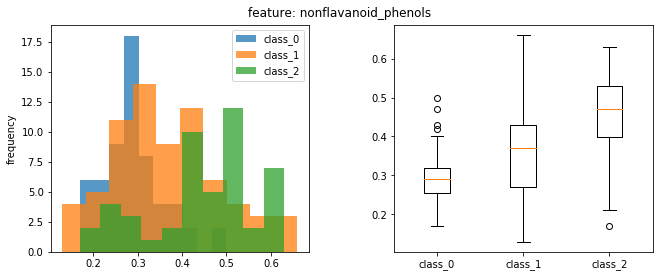

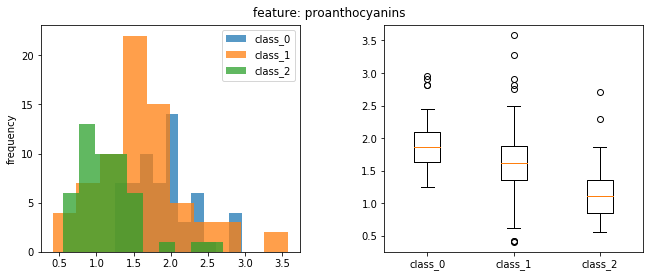

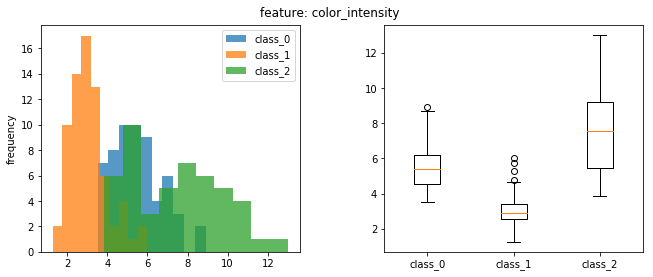

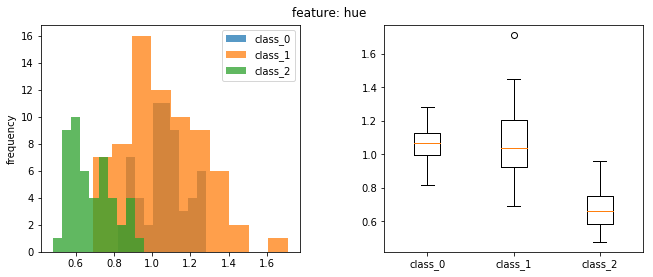

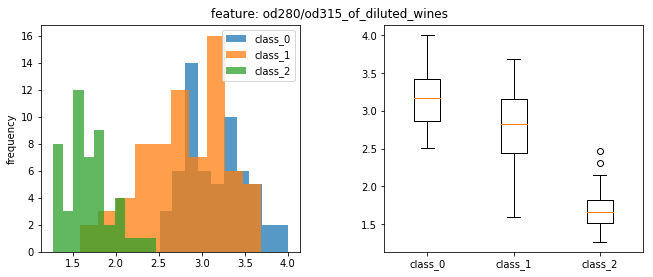

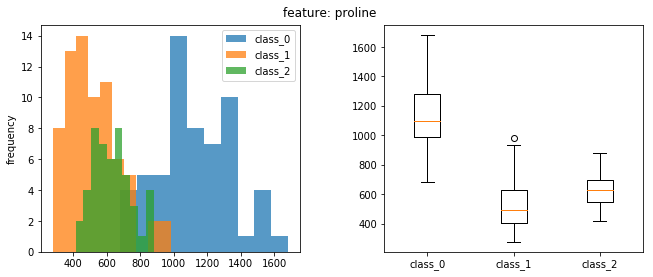

In [17]:
def plot_feature(feature_name):
    fig, axes = plt.subplots(1, 2)
    
    # figure
    title = 'feature: %s' % feature_name
    fig.suptitle(title, fontsize=12)
    fig.tight_layout(pad=2.0, w_pad=2.0, h_pad=5.0)
    fig.set_size_inches((10, 4))

    # histgram
    for i, klass in zip(range(len(wine.target_names)), wine.target_names):
        x = df[wine.target == i][feature_name]
        axes[0].hist(x, histtype='bar', label=klass, alpha = 0.75)

    axes[0].legend(loc='upper right') 
    axes[0].set_ylabel('frequency')

    # boxplot
    class_values = []
    for i, klass in zip(range(len(wine.target_names)), wine.target_names):
        series = df[wine.target == i][feature_name]
        class_values.append(series.values)

    axes[1].boxplot(class_values, labels = wine.target_names)

    
for feature_name in wine.feature_names:
    plot_feature(feature_name)

plt.show()

###  Scatter Plot

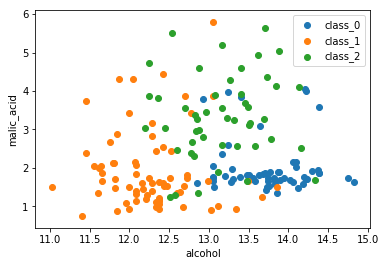

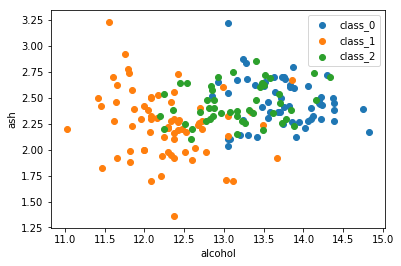

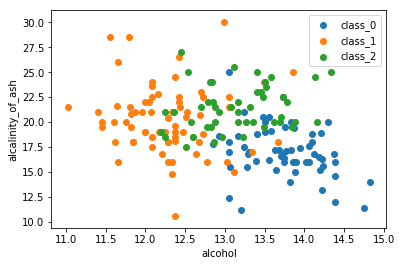

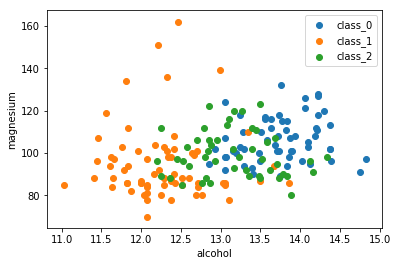

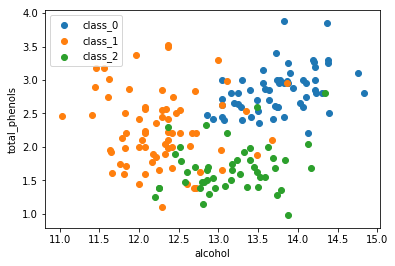

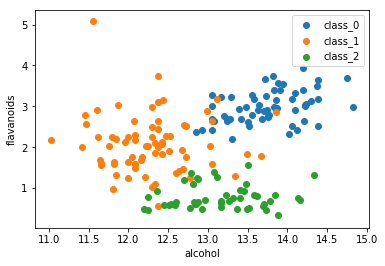

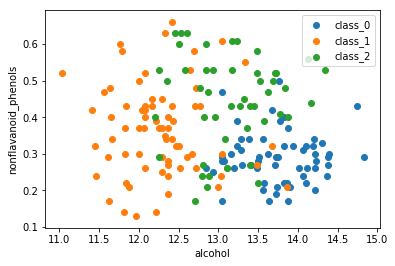

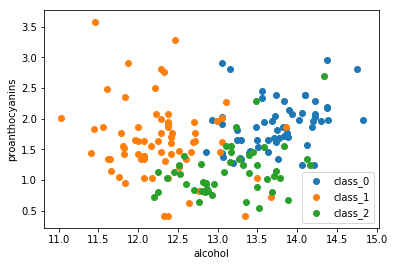

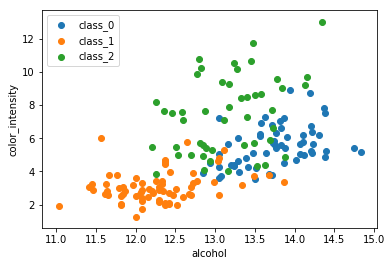

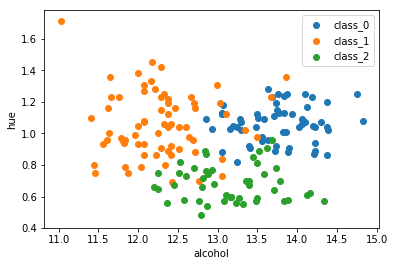

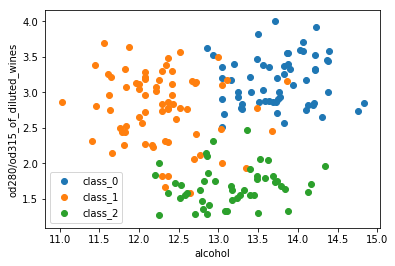

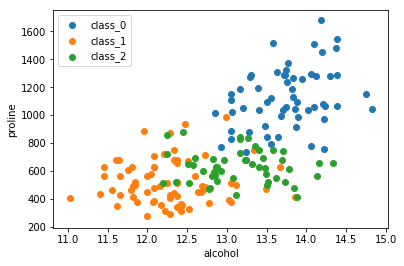

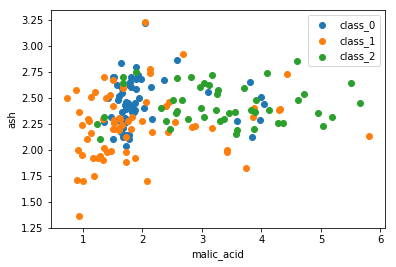

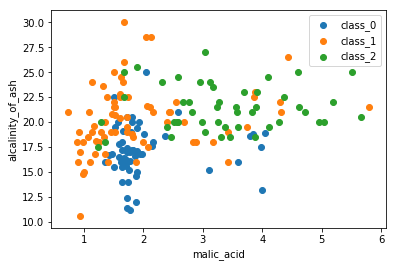

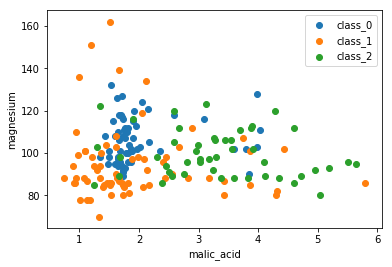

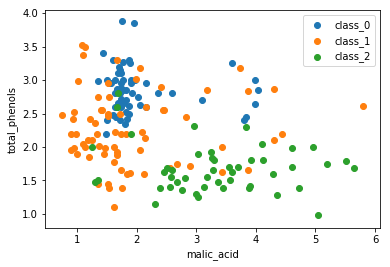

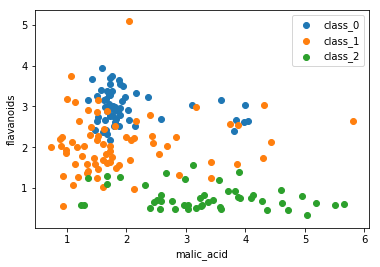

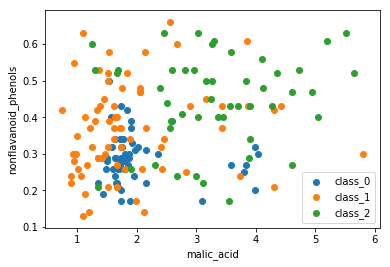

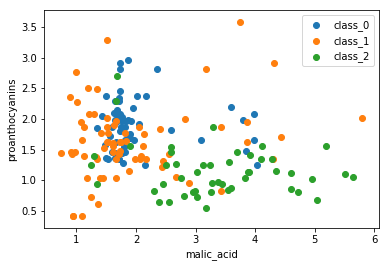

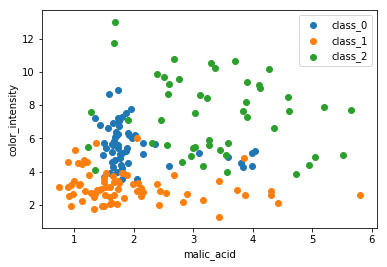

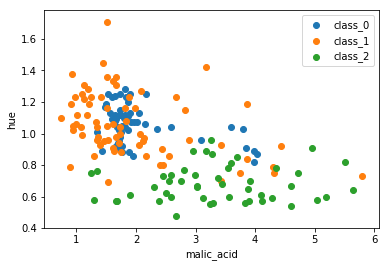

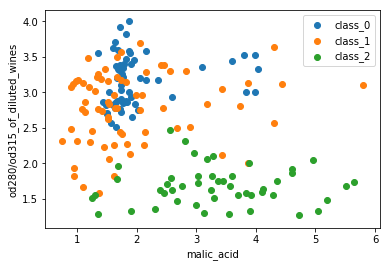

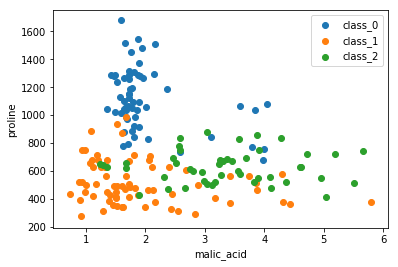

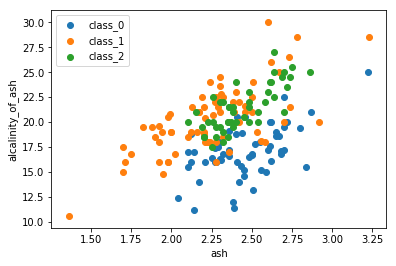

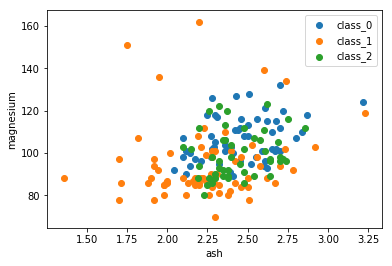

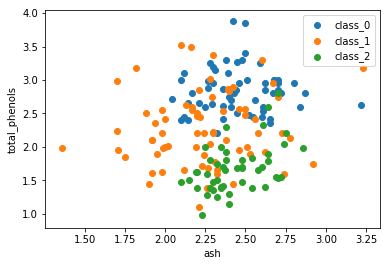

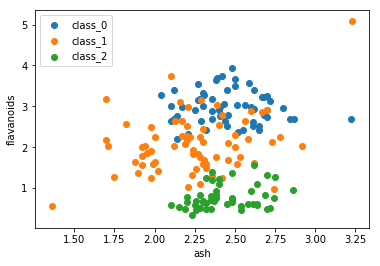

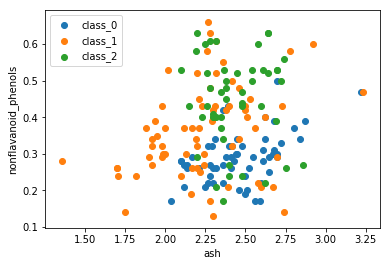

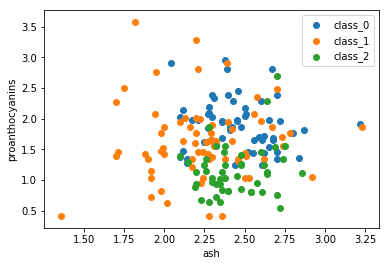

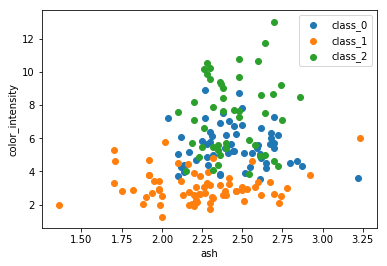

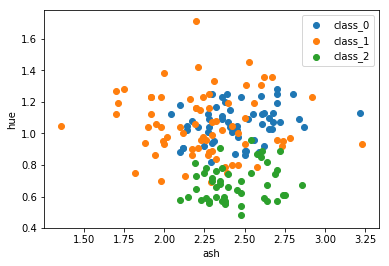

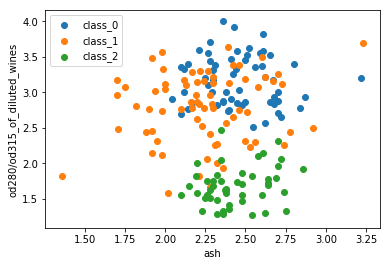

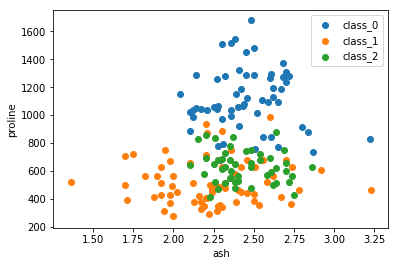

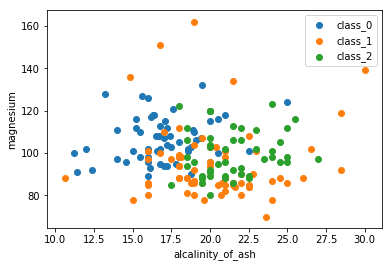

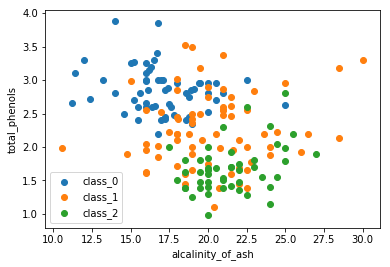

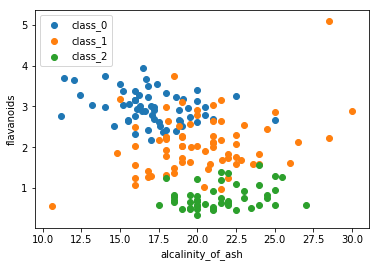

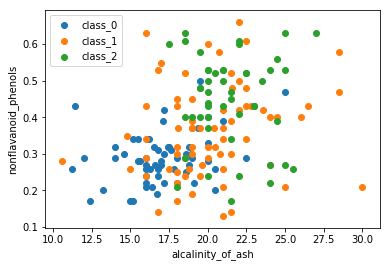

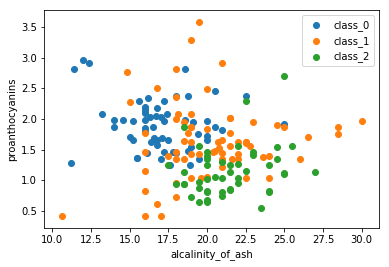

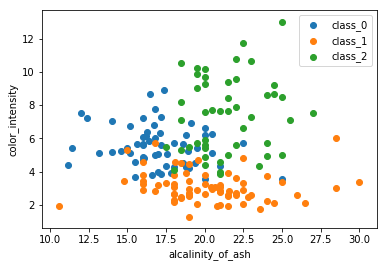

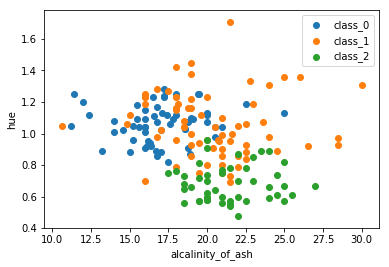

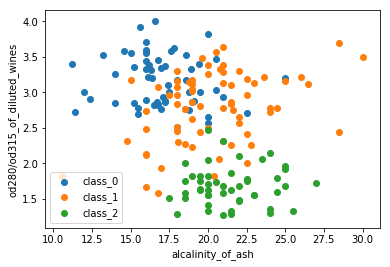

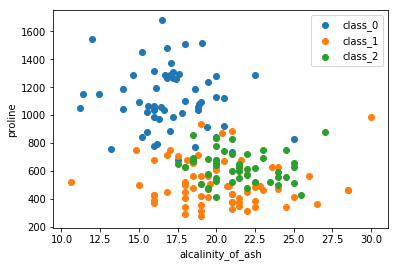

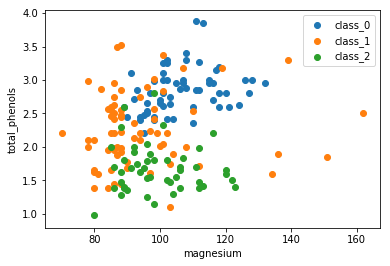

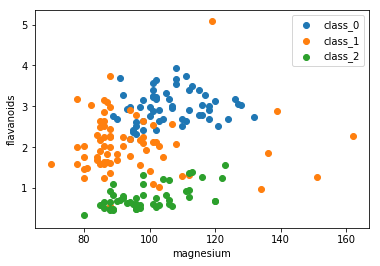

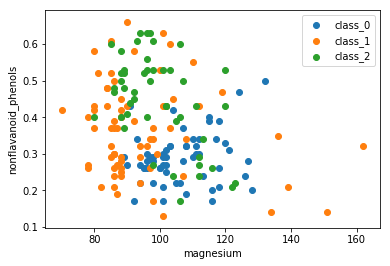

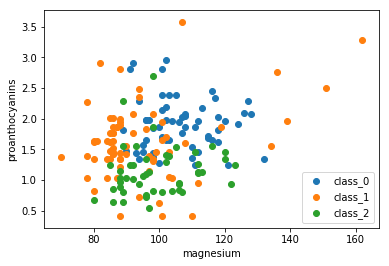

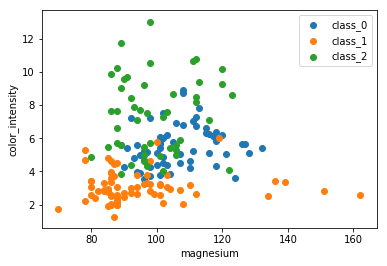

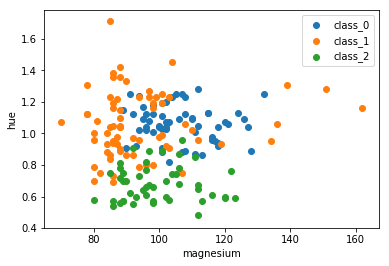

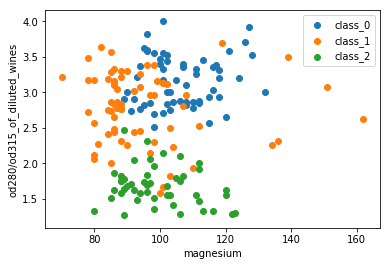

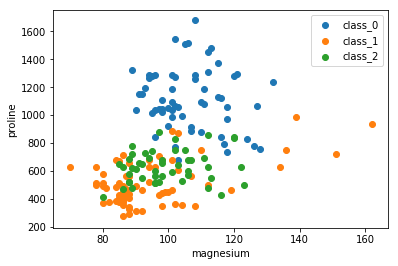

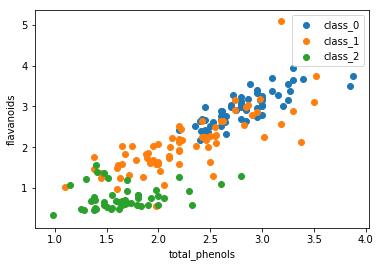

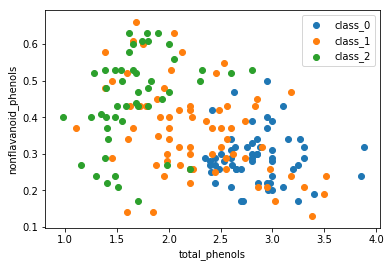

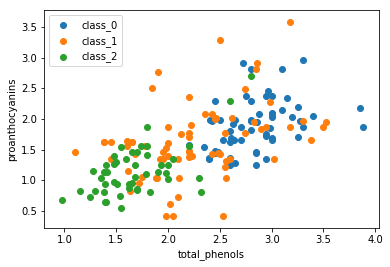

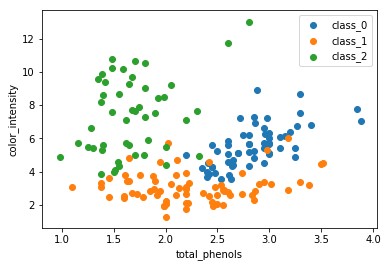

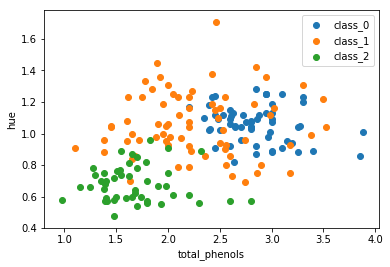

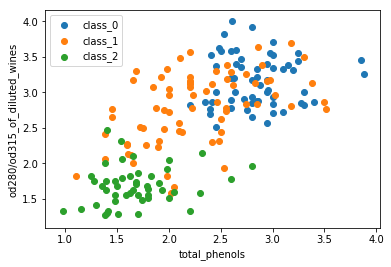

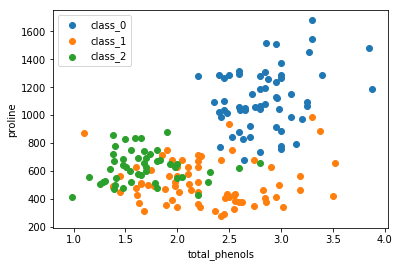

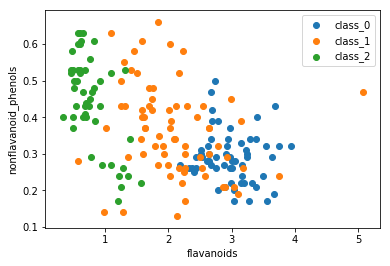

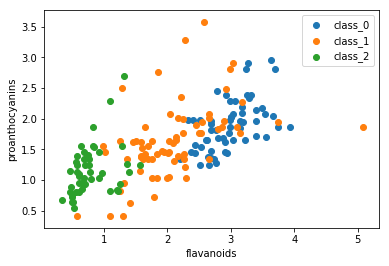

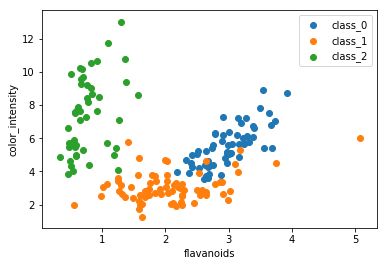

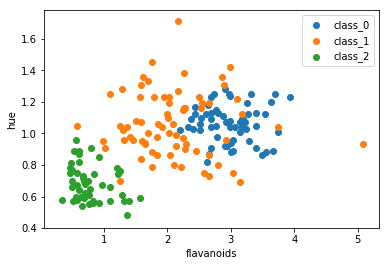

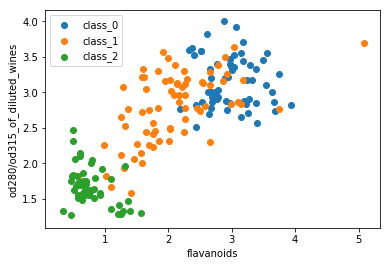

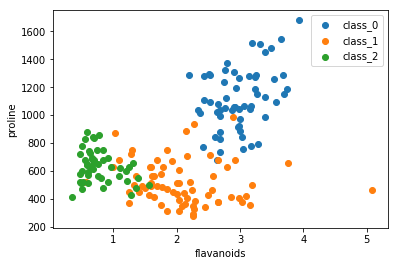

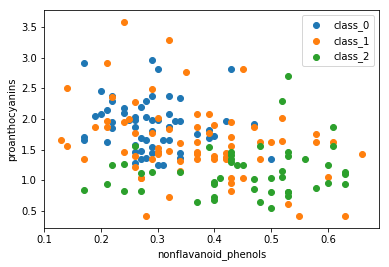

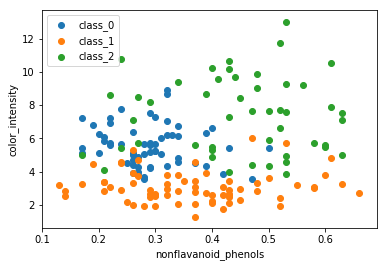

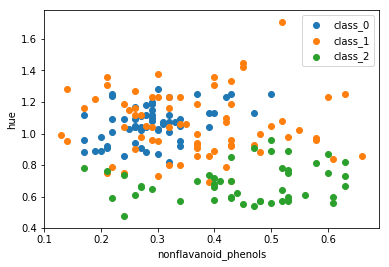

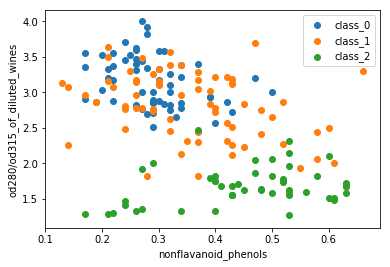

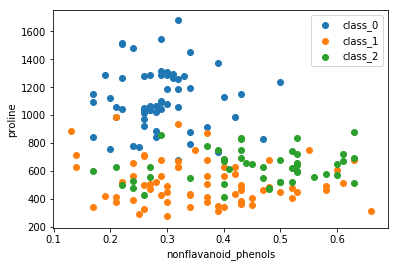

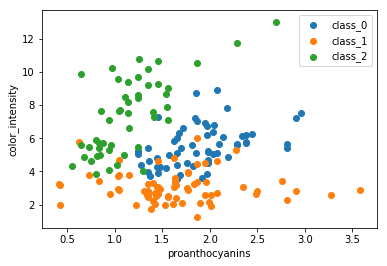

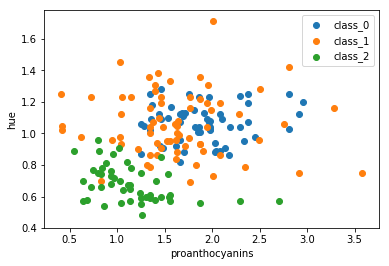

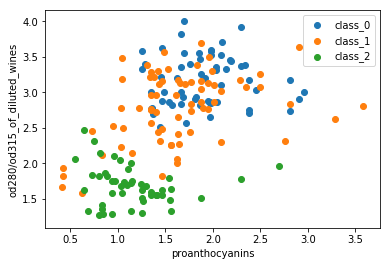

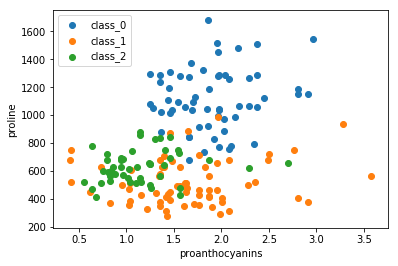

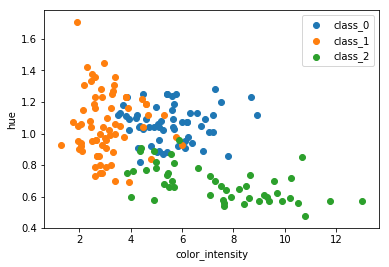

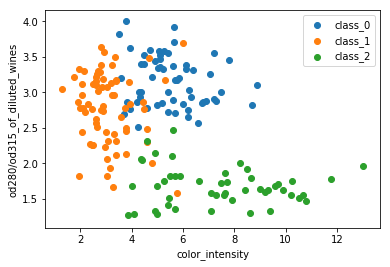

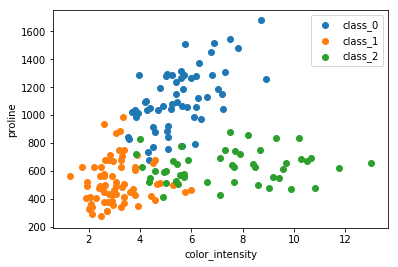

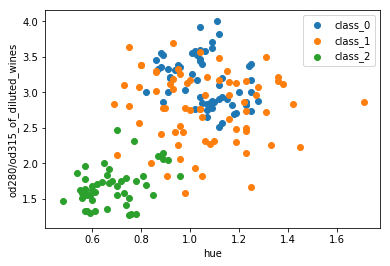

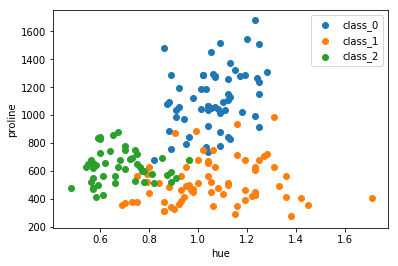

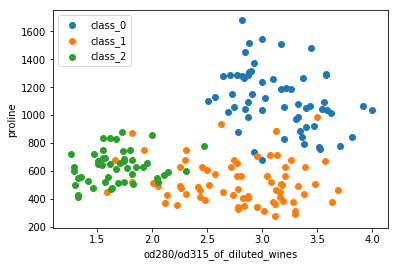

In [18]:
import itertools
for f1, f2 in itertools.combinations(wine.feature_names,2):
    fig = plt.figure()
    
    for yi, target_name in zip(range(len(wine.target_names)), wine.target_names):
        plt.scatter(df[wine.target == yi][f1], df[wine.target == yi][f2], label = target_name)
    
    plt.xlabel(f1)
    plt.ylabel(f2)
    plt.legend()
    plt.show()

## Learning with SVC

### with full features

In [19]:
from sklearn.svm import SVC
clf = SVC(kernel = 'linear', C = 1)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, wine.data, wine.target, cv=5)

print(scores.mean())

0.961861861861862


### with selected features

In [25]:
clf = SVC(kernel = 'linear', C = 1)
selected_features = ['alcohol', 'malic_acid', 'ash',  'magnesium',  'flavanoids', 'color_intensity',  'proline']
X = df.filter(items=selected_features).values
Y = df['target']

scores = cross_val_score(clf, X, Y, cv=5)

print(scores.mean())

0.9836336336336335


## Learning with k-nearest neighbor

In [28]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

scores = cross_val_score(neigh, wine.data, wine.target, cv=5)
print(scores.mean())

0.7041189088247911


## Test

In [85]:
from sklearn.model_selection import train_test_split

selected_features = ['alcohol', 'malic_acid', 'ash',  'magnesium', 'total_phenols', 'flavanoids', 'color_intensity', 'od280/od315_of_diluted_wines', 'proline']
# all_features = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
X = df.filter(items=selected_features).values
Y = df['target']

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, stratify=y)
    clf = SVC(kernel = 'linear', C = 1)
    clf.fit(X_train, y_train)

    print(clf.score(X_test, y_test))

1.0
1.0
1.0
0.9444444444444444
0.8333333333333334
0.9444444444444444
1.0
1.0
1.0
0.9444444444444444
